In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Covid - 19 Envir Master.csv") 
data.head()

,Month,CO_Con,CO_AQI,SO2_Con,SO2_AQI,No2_con,No2_AQI,NG_Con,Tot_Petrol_AS,El_Util_Con_Petrol,...,Tot_ Ind_ Coal,Jet_Fuel,GEO_Pl,NG_Pl,NUC_Pl,OBG_Pl,OT_Pl,SUN,WND,WAT
0,15-Jan,0.746,8.508,1.362,1.392,26.100,24.372,"216,065",11,5,...,56.171,"6,108.00",1043735.01,9423313.460,1566083.0,484336.72,193870.10,634294.26,174258.79,174258.79
1,15-Feb,0.565,6.442,1.169,1.167,23.780,22.198,"165,799",6,4,...,50.573,"6,697.30",950206.01,7085593.050,1527938.0,401114.86,177275.09,847029.25,599978.73,599978.73
2,15-Mar,0.470,5.357,1.390,1.458,22.808,21.261,"168,835",5,4,...,54.717,"5,966.80",965262.02,8174665.661,1695814.0,456488.65,175510.12,1169145.62,798606.03,798606.03
3,15-Apr,0.362,4.054,1.267,1.305,18.717,17.421,"164,979",10,5,...,51.843,"6,608.60",964087.03,7862960.360,1647237.0,406532.33,156495.08,1333625.69,1234461.51,1234461.51
4,15-May,0.285,3.129,0.905,0.876,12.130,11.220,"162,529",48,5,...,56.596,"7,028.40",1056928.05,7536460.740,1697962.0,474720.23,196879.11,1373591.13,1654514.45,1654514.45


In [3]:
list(data.columns)

['Month',
 'CO_Con',
 'CO_AQI',
 'SO2_Con',
 'SO2_AQI',
 'No2_con',
 'No2_AQI',
 'NG_Con',
 'Tot_Petrol_AS',
 'El_Util_Con_Petrol',
 'Indep_Power_Cons_Petrol',
 'Tot_Com_Indus_Petrol',
 'Net_gen_AS',
 'Net_gen_elec_util',
 'Net_gen_Com/ind',
 'Tot_Flights',
 'Tot_Gas',
 'Tot_ Ind_ Coal',
 'Jet_Fuel',
 'GEO_Pl',
 'NG_Pl',
 'NUC_Pl',
 'OBG_Pl',
 'OT_Pl',
 'SUN',
 'WND',
 'WAT']

In [4]:
columnsToDrop = ['CO_Con','CO_AQI', 'SO2_Con', 'SO2_AQI','GEO_Pl','NUC_Pl','OBG_Pl','OT_Pl','SUN','WND','WAT']
data.drop(columns = columnsToDrop, inplace = True)

In [5]:
data.to_csv('cleaned_data_no2.csv')

In [6]:
data.head()

,Month,No2_con,No2_AQI,NG_Con,Tot_Petrol_AS,El_Util_Con_Petrol,Indep_Power_Cons_Petrol,Tot_Com_Indus_Petrol,Net_gen_AS,Net_gen_elec_util,Net_gen_Com/ind,Tot_Flights,Tot_Gas,Tot_ Ind_ Coal,Jet_Fuel,NG_Pl
0,15-Jan,26.100,24.372,"216,065",11,5,5,0,14246.53253,5637.23,1392.17,"64,476",4177.3,56.171,"6,108.00",9423313.460
1,15-Feb,23.780,22.198,"165,799",6,4,1,0,12303.54033,5142.49,1186.70,"57,842",4364.9,50.573,"6,697.30",7085593.050
2,15-Mar,22.808,21.261,"168,835",5,4,1,0,14346.53259,5675.64,1297.22,"67,306",4408.7,54.717,"5,966.80",8174665.661
3,15-Apr,18.717,17.421,"164,979",10,5,5,0,14568.67886,5237.79,1251.57,"66,291",4418.7,51.843,"6,608.60",7862960.360
4,15-May,12.130,11.220,"162,529",48,5,13,30,15435.01408,5531.74,1300.63,"69,056",4478.8,56.596,"7,028.40",7536460.740


In [21]:
data.corr()

,No2_con,No2_AQI,Tot_Petrol_AS,El_Util_Con_Petrol,Indep_Power_Cons_Petrol,Tot_Com_Indus_Petrol,Net_gen_AS,Net_gen_elec_util,Net_gen_Com/ind,Tot_Gas,Tot_ Ind_ Coal,NG_Pl
No2_con,1.000000,0.999983,-0.316088,-0.260992,-0.049621,-0.335423,-0.566728,-0.567571,-0.210012,-0.086703,0.172605,0.090510
No2_AQI,0.999983,1.000000,-0.314902,-0.261093,-0.047876,-0.334618,-0.566896,-0.568328,-0.209255,-0.085700,0.173363,0.091802
Tot_Petrol_AS,-0.316088,-0.314902,1.000000,0.316582,0.537242,0.961047,0.276592,0.178355,0.190684,0.216654,0.178129,0.234702
El_Util_Con_Petrol,-0.260992,-0.261093,0.316582,1.000000,0.217997,0.236562,0.529952,0.544199,0.476604,0.345389,-0.123300,0.355339
Indep_Power_Cons_Petrol,-0.049621,-0.047876,0.537242,0.217997,1.000000,0.296379,0.164401,-0.057142,0.301598,0.093910,0.098309,0.371636
Tot_Com_Indus_Petrol,-0.335423,-0.334618,0.961047,0.236562,0.296379,1.000000,0.213490,0.178093,0.084427,0.205940,0.186693,0.111432
Net_gen_AS,-0.566728,-0.566896,0.276592,0.529952,0.164401,0.213490,1.000000,0.829087,0.694243,0.286050,-0.266497,0.609242
Net_gen_elec_util,-0.567571,-0.568328,0.178355,0.544199,-0.057142,0.178093,0.829087,1.000000,0.435580,0.430492,-0.235848,0.253516
Net_gen_Com/ind,-0.210012,-0.209255,0.190684,0.476604,0.301598,0.084427,0.694243,0.435580,1.000000,0.196744,-0.024175,0.747374
Tot_Gas,-0.086703,-0.085700,0.216654,0.345389,0.093910,0.205940,0.286050,0.430492,0.196744,1.000000,-0.012086,0.181852


In [30]:
data.dtypes
data['Tot_Flights'] = data['Tot_Flights'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [36]:
data.dtypes
data['Jet_Fuel'] = data['Jet_Fuel'].str.replace(',', '').astype(float)
data.head()

,Month,No2_con,No2_AQI,NG_Con,Tot_Petrol_AS,El_Util_Con_Petrol,Indep_Power_Cons_Petrol,Tot_Com_Indus_Petrol,Net_gen_AS,Net_gen_elec_util,Net_gen_Com/ind,Tot_Flights,Tot_Gas,Tot_ Ind_ Coal,Jet_Fuel,NG_Pl
0,15-Jan,26.100,24.372,"216,065",11,5,5,0,14246.53253,5637.23,1392.17,64476.0,4177.3,56.171,6108.0,9423313.460
1,15-Feb,23.780,22.198,"165,799",6,4,1,0,12303.54033,5142.49,1186.70,57842.0,4364.9,50.573,6697.3,7085593.050
2,15-Mar,22.808,21.261,"168,835",5,4,1,0,14346.53259,5675.64,1297.22,67306.0,4408.7,54.717,5966.8,8174665.661
3,15-Apr,18.717,17.421,"164,979",10,5,5,0,14568.67886,5237.79,1251.57,66291.0,4418.7,51.843,6608.6,7862960.360
4,15-May,12.130,11.220,"162,529",48,5,13,30,15435.01408,5531.74,1300.63,69056.0,4478.8,56.596,7028.4,7536460.740


In [39]:
data.dtypes

Month                       object
No2_con                    float64
No2_AQI                    float64
NG_Con                      object
Tot_Petrol_AS                int64
El_Util_Con_Petrol           int64
Indep_Power_Cons_Petrol      int64
Tot_Com_Indus_Petrol         int64
Net_gen_AS                 float64
Net_gen_elec_util          float64
Net_gen_Com/ind            float64
Tot_Flights                float64
Tot_Gas                    float64
Tot_ Ind_ Coal             float64
Jet_Fuel                   float64
NG_Pl                      float64
dtype: object

[Text(0.5, 1.0, 'NO2 Correlation Matrix')]

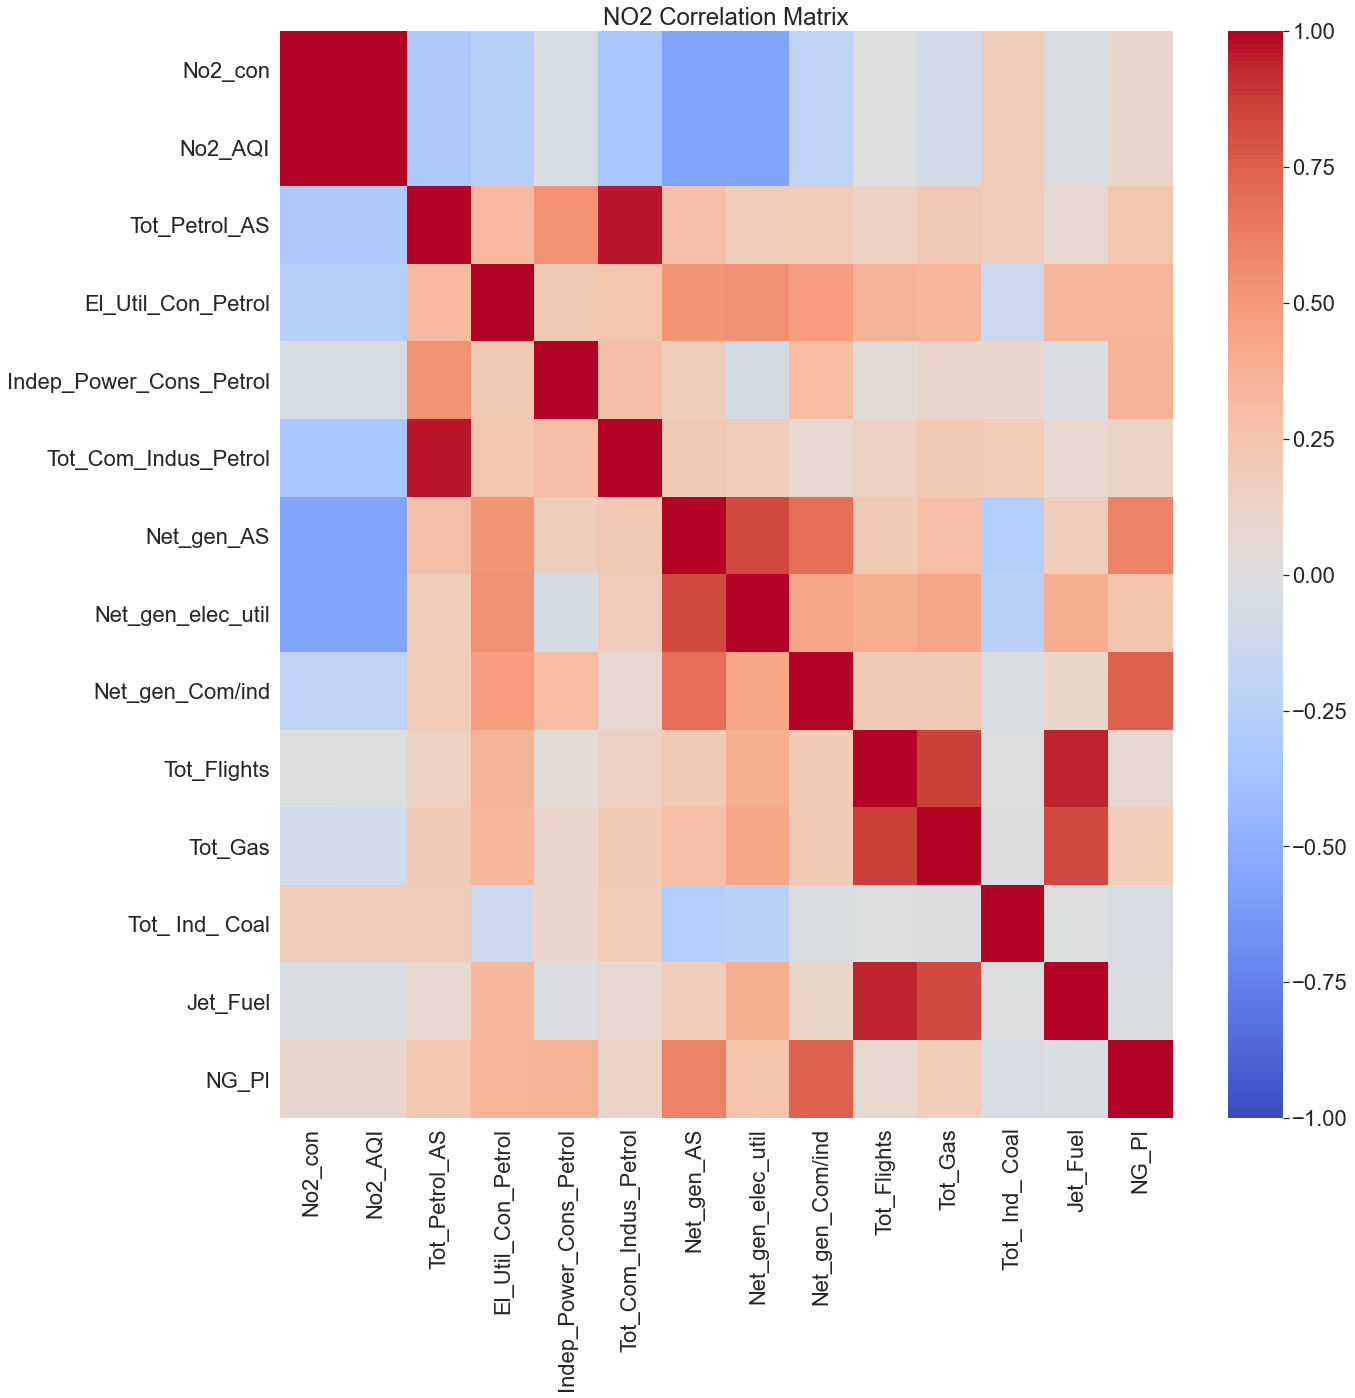

In [37]:
sns.set(rc={'figure.figsize':(20,20)}, font_scale = 2)
# Simple correlation matrix, from -1 to 1
sns.heatmap(data.corr(), cmap = "coolwarm", vmin = -1, vmax = 1).set(title = "NO2 Correlation Matrix") 

[Text(0.5, 1.0, 'NO2 Correlation Matrix')]

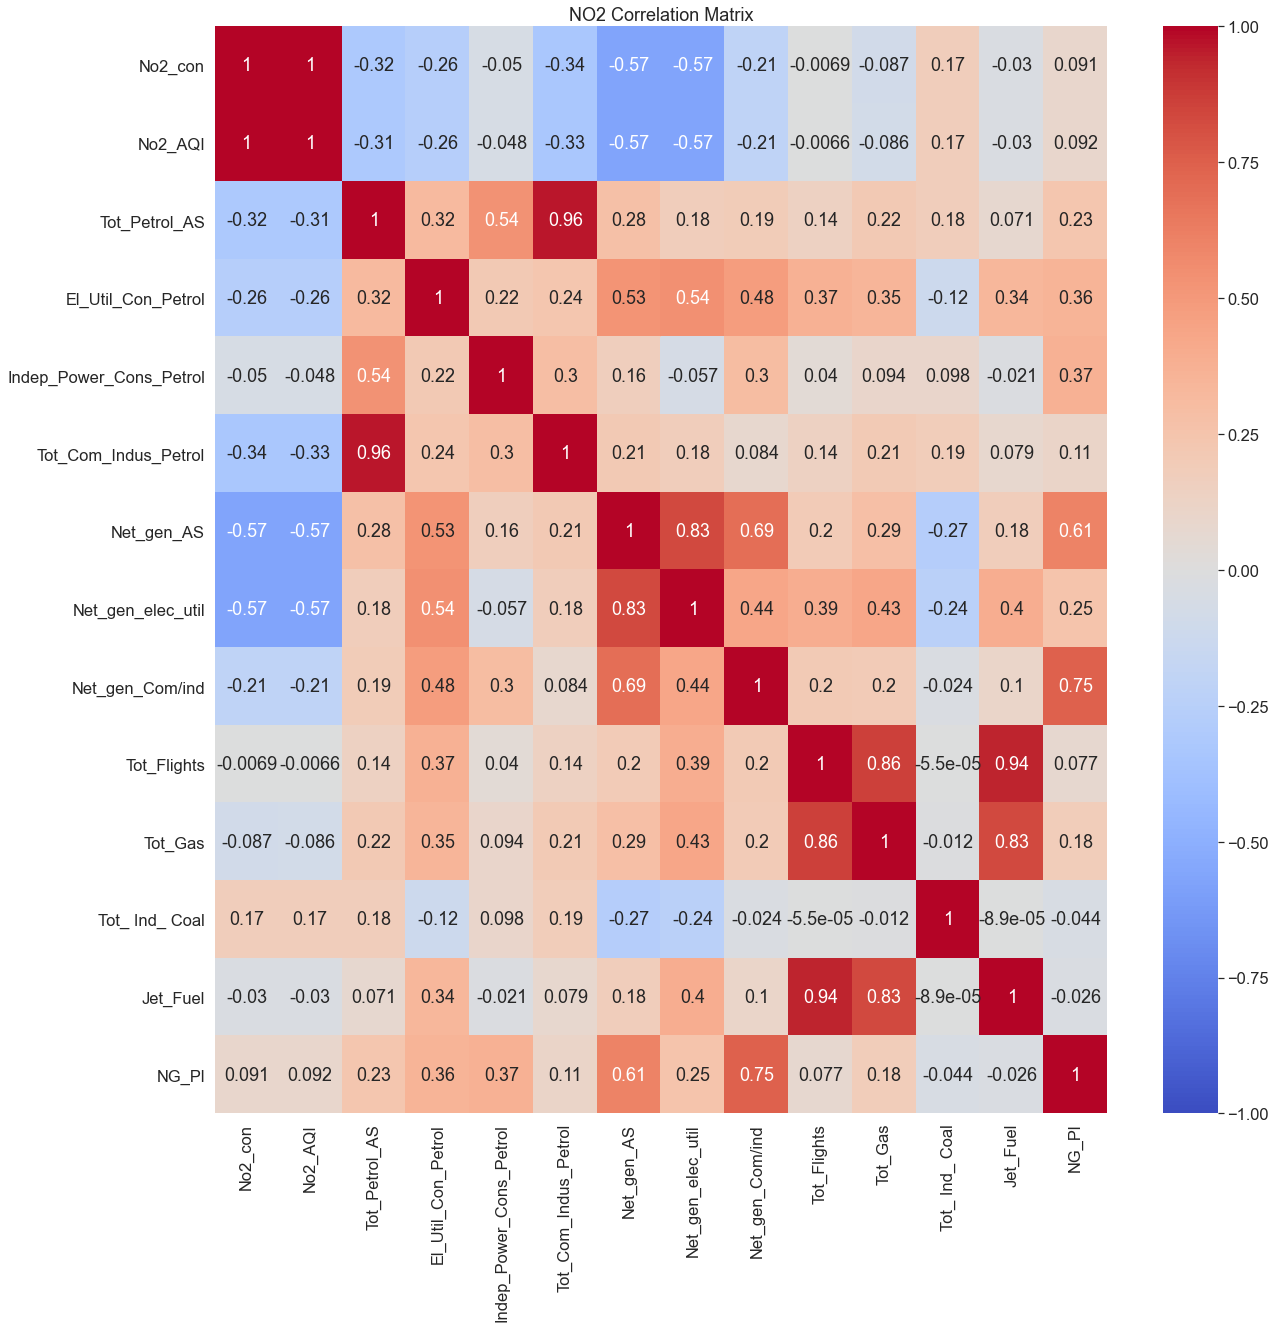

In [38]:
sns.set(rc={'figure.figsize':(20,20)}, font_scale = 1.5)
# Simple correlation matrix, from -1 to 1
sns.heatmap(data.corr(), cmap = "coolwarm", vmin = -1, vmax = 1, annot = 
            data.corr()).set(title = "NO2 Correlation Matrix") 
# Not sure why I'm getting negative correlation with NO2 and most variables...

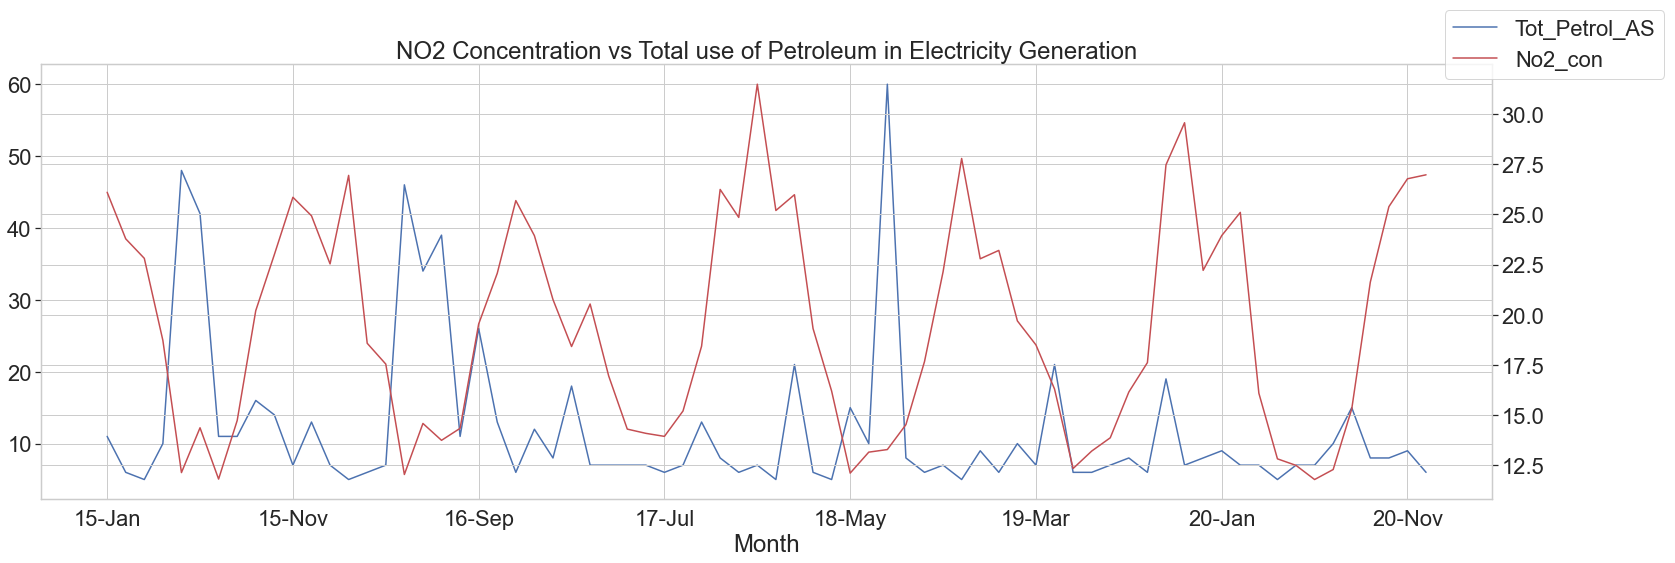

In [14]:
sns.set(rc={'figure.figsize':(26,8)}, font_scale = 2)
sns.set_style('whitegrid')
ax = data.plot(x="Month", y="Tot_Petrol_AS", legend=False)
ax2 = ax.twinx()
data.plot(x="Month", y="No2_con", ax=ax2, legend=False, color="r").set(title = "NO2 Concentration vs Total use of Petroleum in Electricity Generation")
ax.figure.legend()
plt.show()

# Plot to visualize NO2 against total consumption of petroleum for electricity across all sectors


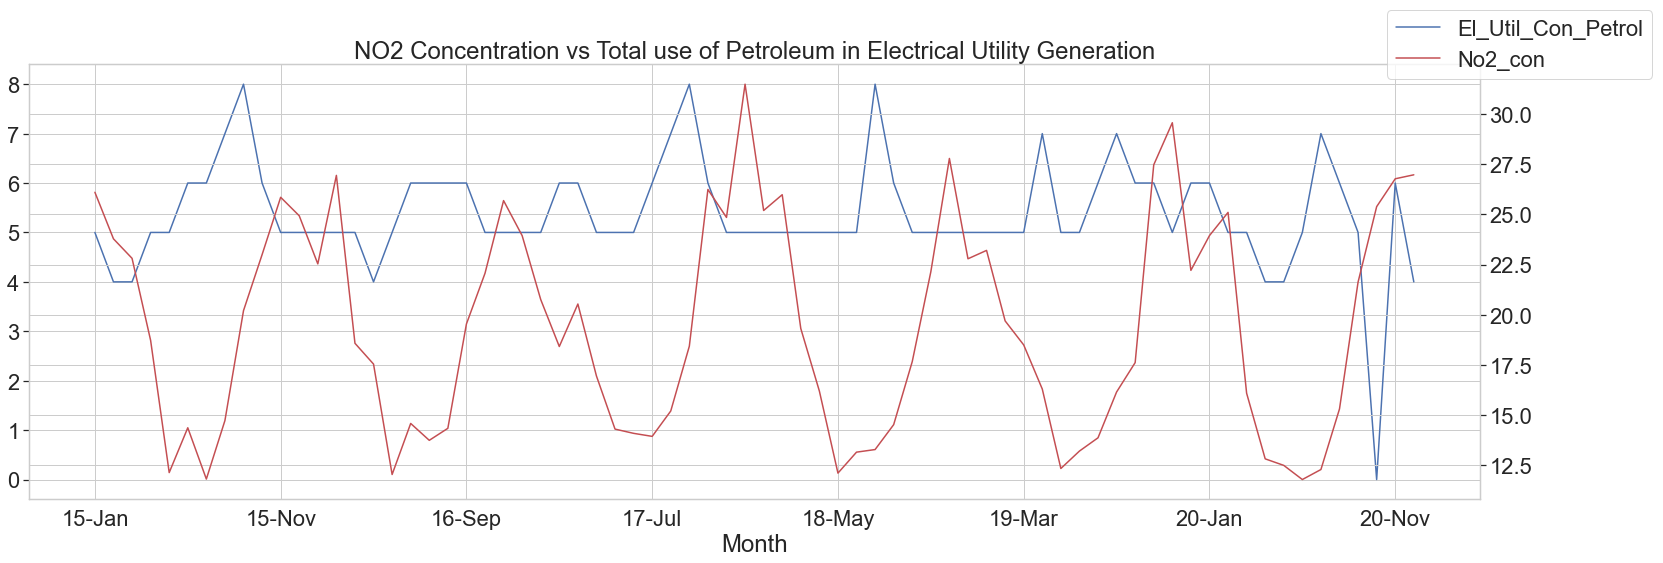

In [15]:
sns.set(rc={'figure.figsize':(26,8)}, font_scale = 2)
sns.set_style('whitegrid')
ax = data.plot(x="Month", y="El_Util_Con_Petrol", legend=False)
ax2 = ax.twinx()
data.plot(x="Month", y="No2_con", ax=ax2, legend=False, color="r").set(title = "NO2 Concentration vs Total use of Petroleum in Electrical Utility Generation")
ax.figure.legend()
plt.show()

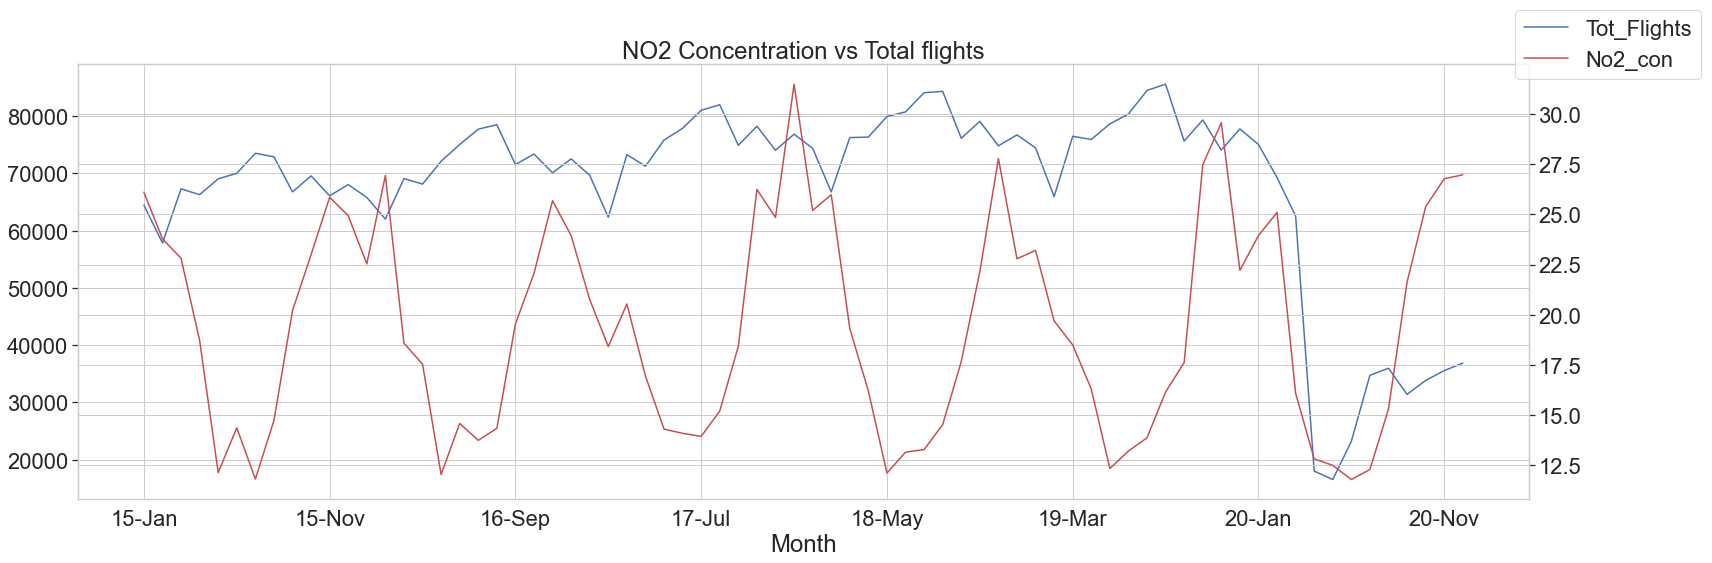

In [40]:
sns.set(rc={'figure.figsize':(26,8)}, font_scale = 2)
sns.set_style('whitegrid')
ax = data.plot(x="Month", y="Tot_Flights", legend=False)
ax2 = ax.twinx()
data.plot(x="Month", y="No2_con", ax=ax2, legend=False, color="r").set(title = "NO2 Concentration vs Total flights")
ax.figure.legend()
plt.show()